### Importing the neccessary libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [ ]:
# importing the data
winedata = pd.read_csv("QualityPrediction.csv")

In [ ]:
winedata.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
winedata.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
winedata.shape

(1599, 12)

In [ ]:
#Checking information about the data
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#checking null values
winedata.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Renaming the cols to avoid unwanted errors
winedata= winedata.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide' : 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'})

### Data Analysis

In [ ]:
winedata.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#checking duplicates
duplicate_rows = winedata.duplicated()
duplicate_rows.sum()

240

In [ ]:
#Removing duplicate values
winedata.drop_duplicates(inplace=True)

In [ ]:
winedata

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#Checking for the duplicates
winedata.duplicated().sum()

0

In [ ]:
#Unique value analysis
winedata.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [ ]:
winedata['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [ ]:
winedata['quality'].value_counts(dropna=False, normalize=True)

#There are 6 different qualities of wine(3 to 8)

quality
5    0.424577
6    0.393672
7    0.122884
4    0.038999
8    0.012509
3    0.007358
Name: proportion, dtype: float64

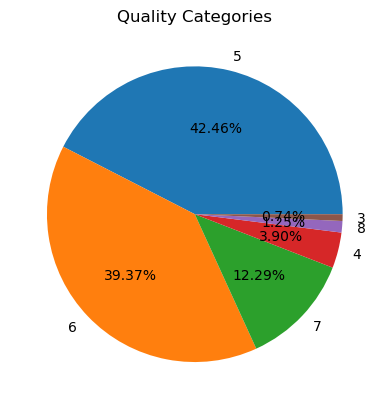

In [ ]:
#ploting the quality col percentage in the pie chart
plt.pie(winedata['quality'].value_counts(dropna=False),
        labels=df['quality'].value_counts(dropna=False).index,
       autopct='%0.2f%%')
plt.title("Quality Categories")
plt.show()

In [ ]:
### co-relation matrix
corr =winedata.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile_acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric_acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual_sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free_sulfur_dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total_sulfur_dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


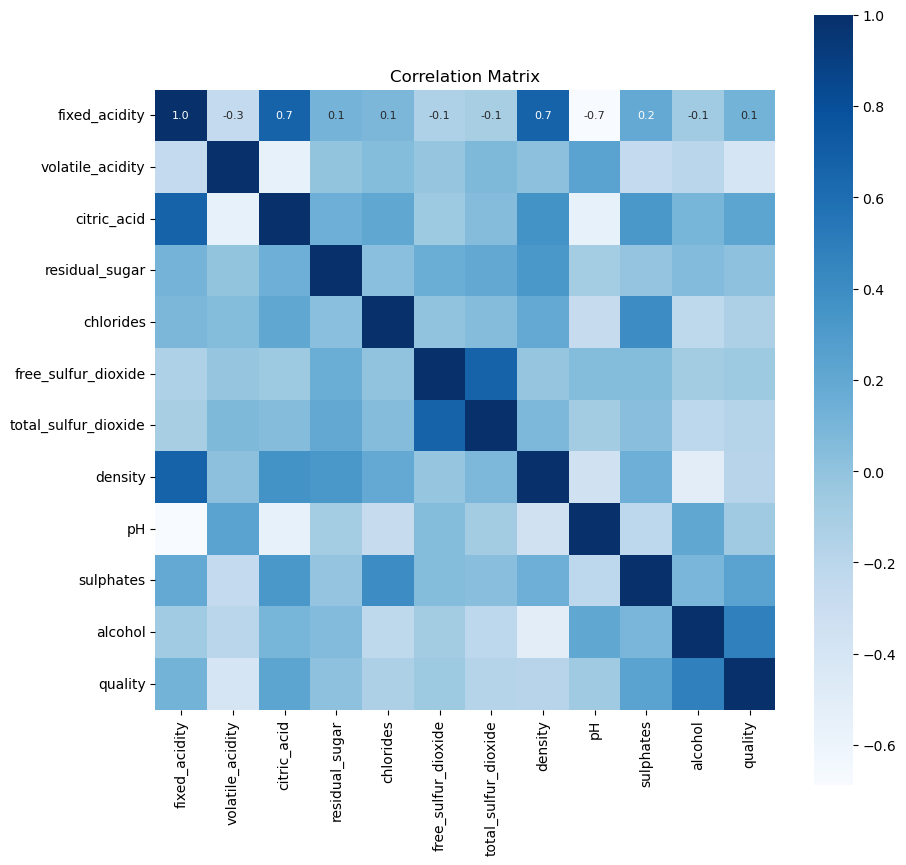

In [ ]:
#Heatmap Represention of datas
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar= True, square = True, fmt ='.1f', annot=True, annot_kws={'size':8} ,cmap= 'Blues')
plt.title('Correlation Matrix')
plt.show()

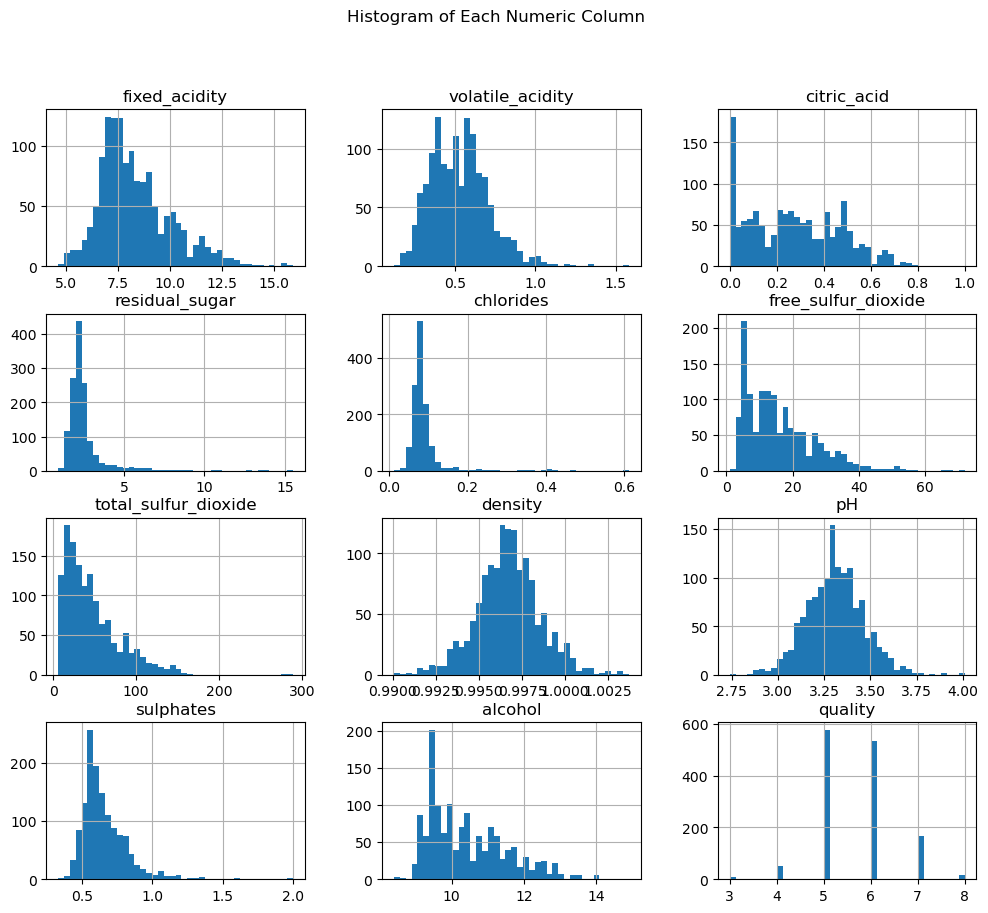

In [ ]:
#Histogram for numeric col
winedata.hist(figsize=(12, 10), bins =40)
plt.suptitle('Histogram of Each Numeric Column')
plt.show()

### Outlier handling

In [ ]:
def calculate_IQR (df):
    summary_df = winedata. describe()
    summary_df

    summary_df_tranpose = summary_df.loc[["min","25%","75%","max"]].T
    summary_df_tranpose = summary_df_tranpose.rename(columns = {"25%" : "Q1","75%" : "Q3"})

    summary_df_tranpose.insert(0,"Columns",summary_df_tranpose.index)
    summary_df_tranpose = summary_df_tranpose.reset_index(drop=True)
    summary_df_tranpose['IQR'] = summary_df_tranpose['Q3'] - summary_df_tranpose['Q1']
    summary_df_tranpose['Min_Th'] = summary_df_tranpose['Q1'] - 1.5*summary_df_tranpose['IQR']
    summary_df_tranpose['Max_Th'] = summary_df_tranpose['Q3'] + 1.5*summary_df_tranpose['IQR']
    display(summary_df_tranpose)

In [ ]:
calculate_IQR(winedata)

,Columns,min,Q1,Q3,max,IQR,Min_Th,Max_Th
0,fixed_acidity,4.60000,7.1000,9.20000,15.90000,2.10000,3.95000,12.35000
1,volatile_acidity,0.12000,0.3900,0.64000,1.58000,0.25000,0.01500,1.01500
2,citric_acid,0.00000,0.0900,0.43000,1.00000,0.34000,-0.42000,0.94000
3,residual_sugar,0.90000,1.9000,2.60000,15.50000,0.70000,0.85000,3.65000
4,chlorides,0.01200,0.0700,0.09100,0.61100,0.02100,0.03850,0.12250
5,free_sulfur_dioxide,1.00000,7.0000,21.00000,72.00000,14.00000,-14.00000,42.00000
6,total_sulfur_dioxide,6.00000,22.0000,63.00000,289.00000,41.00000,-39.50000,124.50000
7,density,0.99007,0.9956,0.99782,1.00369,0.00222,0.99227,1.00115
8,pH,2.74000,3.2100,3.40000,4.01000,0.19000,2.92500,3.68500
9,sulphates,0.33000,0.5500,0.73000,2.00000,0.18000,0.28000,1.00000


<Axes: >

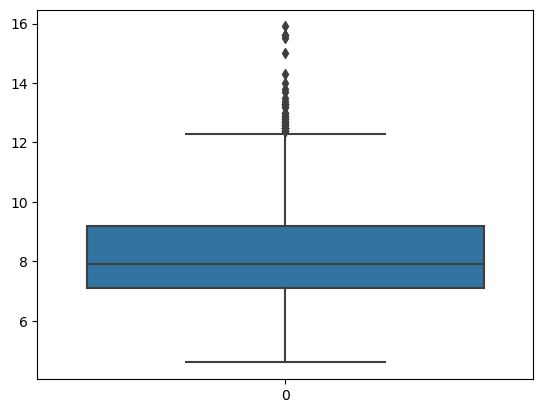

In [ ]:
sns.boxplot(winedata['fixed_acidity'])

<Axes: >

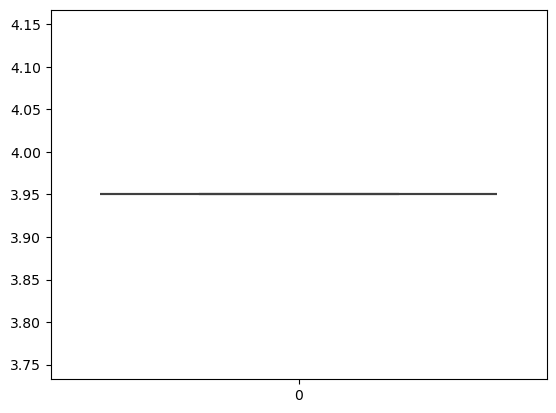

In [ ]:
#clipping outlier for sns.boxplot(winedata['fixed_acidity'])
winedata.fixed_acidity = winedata.fixed_acidity.clip( lower=3.95000, upper=3.95000)
winedata.fixed_acidity
sns.boxplot(winedata['fixed_acidity'])

In [ ]:
#cliping outliers for density

In [ ]:
winedata.density = winedata.density.clip( lower=0.992248, upper=1.001187)
winedata.density

0       0.99780
1       0.99680
2       0.99700
3       0.99800
5       0.99780
         ...   
1593    0.99651
1594    0.99490
1595    0.99512
1597    0.99547
1598    0.99549
Name: density, Length: 1359, dtype: float64

<Axes: ylabel='density'>

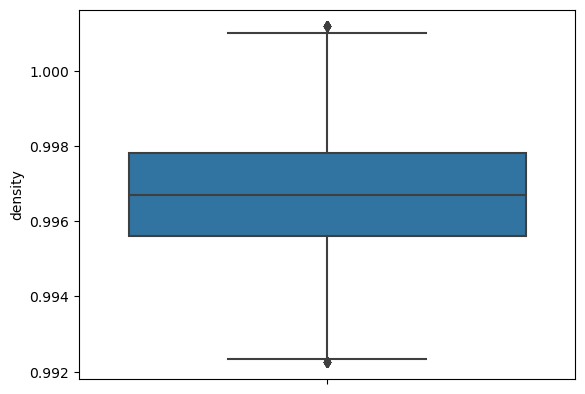

In [ ]:
sns.boxplot(y=winedata.density)

In [ ]:
#clipping outlier for volatile_acidity
winedata.volatile_acidity = winedata.volatile_acidity.clip( lower=0.01500, upper=1.01500)
winedata.volatile_acidity

0       0.700
1       0.880
2       0.760
3       0.280
5       0.660
        ...  
1593    0.620
1594    0.600
1595    0.550
1597    0.645
1598    0.310
Name: volatile_acidity, Length: 1359, dtype: float64

<Axes: ylabel='volatile_acidity'>

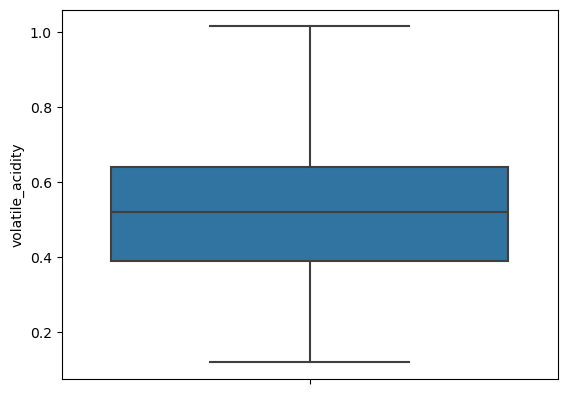

In [ ]:
sns.boxplot(y = winedata.volatile_acidity)

In [ ]:
#clipping outliers for citric_acid
winedata.citric_acid = winedata.citric_acid.clip( lower=-0.42000, upper=0.94000)
winedata.citric_acid

0       0.00
1       0.00
2       0.04
3       0.56
5       0.00
        ... 
1593    0.08
1594    0.08
1595    0.10
1597    0.12
1598    0.47
Name: citric_acid, Length: 1359, dtype: float64

<Axes: ylabel='citric_acid'>

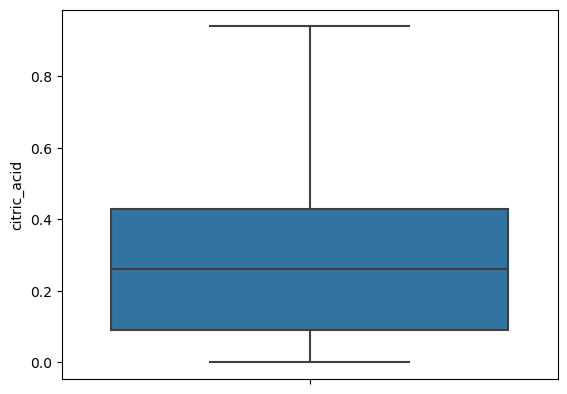

In [ ]:
sns.boxplot(y=winedata.citric_acid)

In [ ]:
#clipping outliers for residual_sugar
winedata.residual_sugar = winedata.residual_sugar.clip( lower=0.85000, upper=3.65000)
winedata.residual_sugar

0       1.9
1       2.6
2       2.3
3       1.9
5       1.8
       ... 
1593    1.9
1594    2.0
1595    2.2
1597    2.0
1598    3.6
Name: residual_sugar, Length: 1359, dtype: float64

<Axes: ylabel='residual_sugar'>

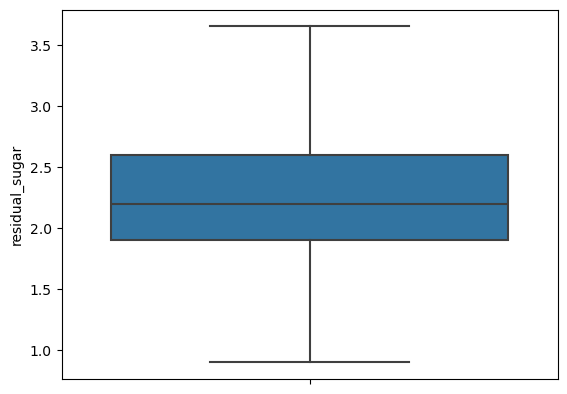

In [ ]:
sns.boxplot(y=winedata.residual_sugar)

In [ ]:
#clipping outliers for chlorides
winedata.chlorides = winedata.chlorides.clip( lower=0.03850, upper=0.12250)
winedata.chlorides

0       0.076
1       0.098
2       0.092
3       0.075
5       0.075
        ...  
1593    0.068
1594    0.090
1595    0.062
1597    0.075
1598    0.067
Name: chlorides, Length: 1359, dtype: float64

<Axes: ylabel='chlorides'>

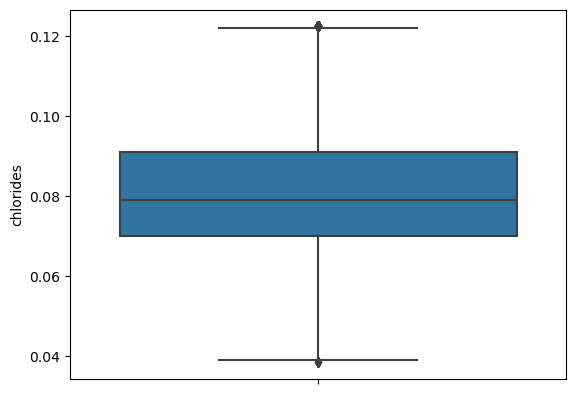

In [ ]:
sns.boxplot(y=winedata.chlorides)

In [ ]:
#clipping outliers for free_sulfur_dioxide
winedata.free_sulfur_dioxide = winedata.free_sulfur_dioxide.clip( lower=-14.00000, upper=42.00000)
winedata.free_sulfur_dioxide

0       11.0
1       25.0
2       15.0
3       17.0
5       13.0
        ... 
1593    28.0
1594    32.0
1595    39.0
1597    32.0
1598    18.0
Name: free_sulfur_dioxide, Length: 1359, dtype: float64

<Axes: ylabel='free_sulfur_dioxide'>

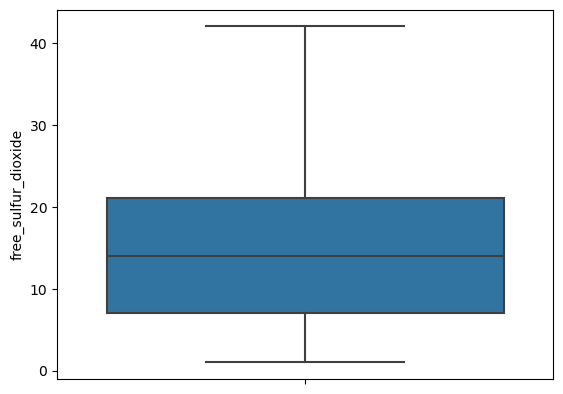

In [ ]:
sns.boxplot(y=winedata.free_sulfur_dioxide)


<Axes: ylabel='total_sulfur_dioxide'>

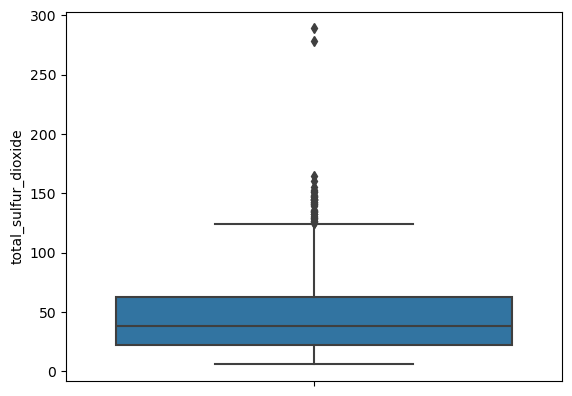

In [ ]:
sns.boxplot(y=winedata.total_sulfur_dioxide)

In [ ]:
#clippling outlier for total_sulfur_dioxide
winedata.total_sulfur_dioxide = winedata.total_sulfur_dioxide.clip( lower=-39.50000	, upper=124.50000)
winedata.total_sulfur_dioxide

0       34.0
1       67.0
2       54.0
3       60.0
5       40.0
        ... 
1593    38.0
1594    44.0
1595    51.0
1597    44.0
1598    42.0
Name: total_sulfur_dioxide, Length: 1359, dtype: float64

<Axes: ylabel='total_sulfur_dioxide'>

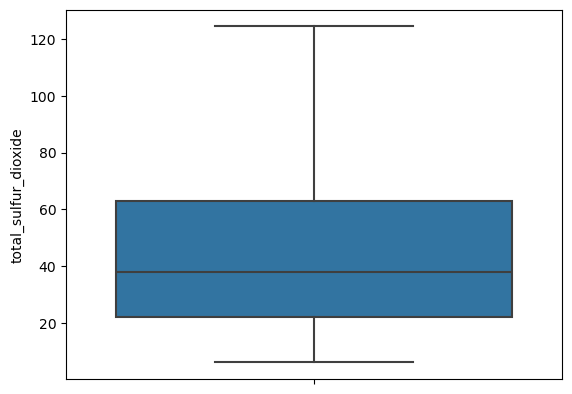

In [ ]:
sns.boxplot(y=winedata.total_sulfur_dioxide)

In [ ]:
# Clipping the oulier values for pH col

winedata.pH = winedata.pH.clip( lower=2.925000, upper=3.685000)
winedata.pH

0       3.51
1       3.20
2       3.26
3       3.16
5       3.51
        ... 
1593    3.42
1594    3.45
1595    3.52
1597    3.57
1598    3.39
Name: pH, Length: 1359, dtype: float64

<Axes: ylabel='pH'>

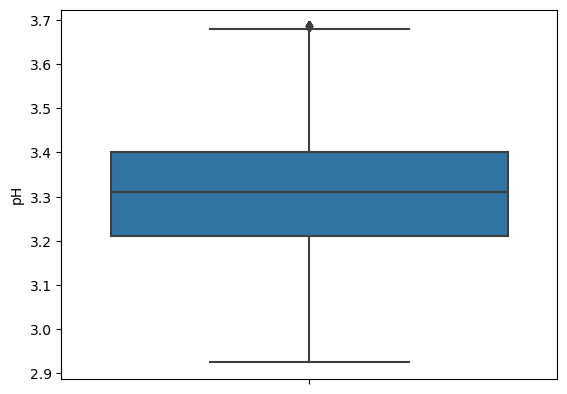

In [ ]:
sns.boxplot(y = winedata.pH)

<Axes: ylabel='alcohol'>

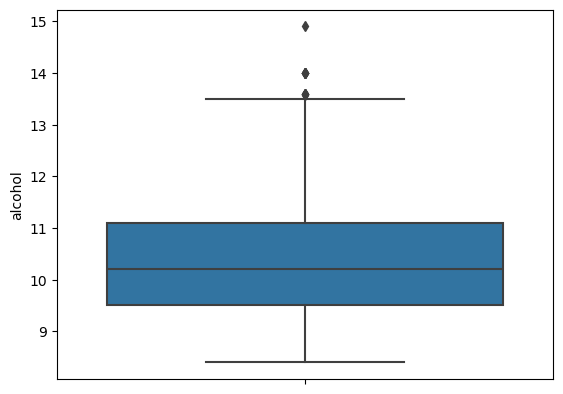

In [ ]:
#Clipping the outlier values for Alcohol
sns.boxplot(y= winedata.alcohol)

In [ ]:
winedata.alcohol = winedata.alcohol.clip( lower=7.100000, upper=13.500000)
winedata.alcohol

0        9.4
1        9.8
2        9.8
3        9.8
5        9.4
        ... 
1593     9.5
1594    10.5
1595    11.2
1597    10.2
1598    11.0
Name: alcohol, Length: 1359, dtype: float64

<Axes: >

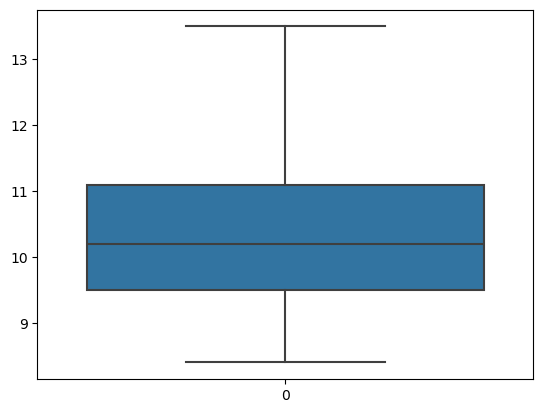

In [ ]:
sns.boxplot(winedata.alcohol)

<Axes: ylabel='sulphates'>

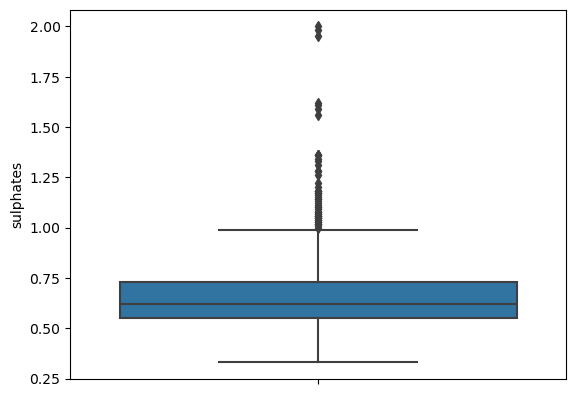

In [ ]:
#Clipping the outlier values for sulphates
sns.boxplot(y= winedata.sulphates)

In [ ]:
winedata.sulphates = winedata.sulphates.clip( lower=0.280000	, upper=1.000000)
winedata.sulphates

0       0.56
1       0.68
2       0.65
3       0.58
5       0.56
        ... 
1593    0.82
1594    0.58
1595    0.76
1597    0.71
1598    0.66
Name: sulphates, Length: 1359, dtype: float64

<Axes: ylabel='sulphates'>

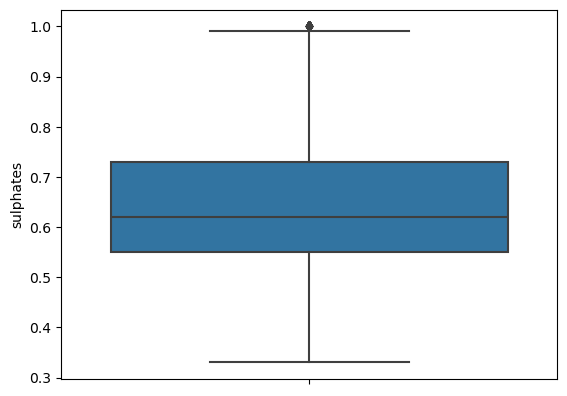

In [ ]:
sns.boxplot(y=winedata.sulphates)

array([<Axes: title={'center': 'fixed_acidity'}>,
       <Axes: title={'center': 'volatile_acidity'}>,
       <Axes: title={'center': 'citric_acid'}>,
       <Axes: title={'center': 'residual_sugar'}>,
       <Axes: title={'center': 'chlorides'}>,
       <Axes: title={'center': 'free_sulfur_dioxide'}>,
       <Axes: title={'center': 'total_sulfur_dioxide'}>,
       <Axes: title={'center': 'density'}>,
       <Axes: title={'center': 'pH'}>,
       <Axes: title={'center': 'sulphates'}>,
       <Axes: title={'center': 'alcohol'}>,
       <Axes: title={'center': 'quality'}>], dtype=object)

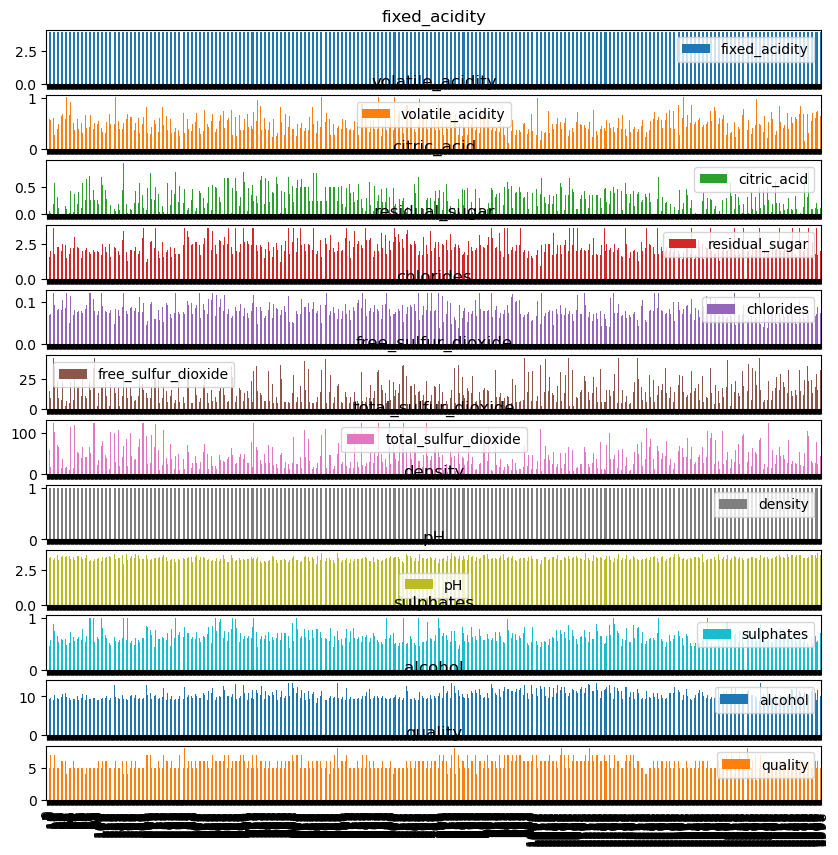

In [ ]:
winedata.plot(kind = 'bar', subplots = True , figsize =(10,10))

In [ ]:
#Dividing quality into 2 categories:
winedata['goodquality']= [1 if i>=7 else 0 for i in winedata['quality']]


In [ ]:
winedata['goodquality'].value_counts()

goodquality
0    1175
1     184
Name: count, dtype: int64

In [ ]:
winedata.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,3.95,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,3.95,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,3.95,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,3.95,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,3.95,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
#Separating dependent and independent variable
x=winedata.drop(['quality', 'goodquality'], axis =1)
y =winedata['goodquality']

In [ ]:
#splitting Train and Test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state =40)

In [ ]:

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
#Table to store  accuracy value

model_accuracy_table = pd.DataFrame(columns= ['Models', 'Accuracy_Scores'])


### RandomStateClassifier

In [ ]:

fit_wine_rf = RandomForestClassifier()

### Hyperparameter optimization using GridSearchCV

In [ ]:

np.random.seed(42)

param_dist = {'max_depth': [2, 3, 4,5,6,7,8],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_wine_rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)



Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}


In [ ]:
# Setting best parameters given by grid search
fit_wine_rf.set_params(criterion = 'gini',
                  max_depth = 5)

RandomForestClassifier(max_depth=5)

In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(1359,) (1087,) (272,)


In [ ]:
fit_wine_rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=5)

### Accuracy score:

In [ ]:
y_test_pred = fit_wine_rf.predict(x_test)

test_data_score = accuracy_score(y_test, y_test_pred)


In [ ]:
train_data_score = fit_wine_rf.score(x_train,y_train)

In [ ]:
print("Accuracy for Train data Random Forest Classifier: ", train_data_score)
print("Accuracy for Test data Random Forest Classifier: ", test_data_score)


Accuracy for Train data Random Forest Classifier:  0.9319781078967944
Accuracy for Test data Random Forest Classifier:  0.89375


In [ ]:
model_accuracy_table.loc[len(model_accuracy_table)]= ['Random forest Classifier:',test_data_score]
model_accuracy_table

,Models,Accuracy_Scores
0,Random forest Classifier:,0.89375


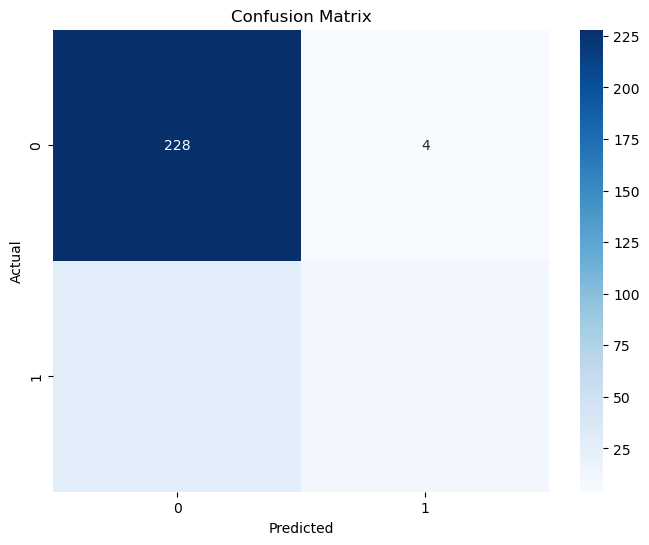

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("confusion matrix:" ,cm)

confusion matrix: [[228   4]
 [ 29  11]]


In [ ]:
# Classification Report
print("Classification Report Random forest:")
print(classification_report(y_test, y_test_pred))

Classification Report Random forest:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       232
           1       0.73      0.28      0.40        40

    accuracy                           0.88       272
   macro avg       0.81      0.63      0.67       272
weighted avg       0.86      0.88      0.85       272



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

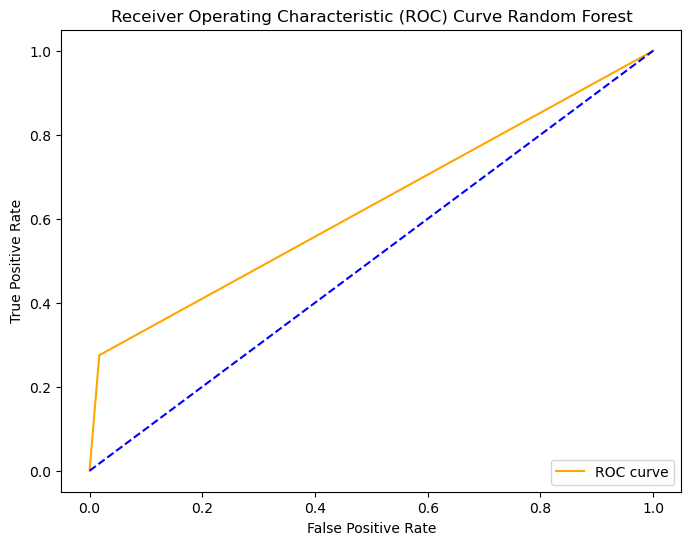

In [ ]:
#Roc curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# AUC Score
auc_rf = roc_auc_score(y_test, y_test_pred)

print("AUC Score using Random Forest:", auc_rf)

AUC Score using Random Forest: 0.6267241379310344


In [ ]:
# Additional Classification Metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

# Recall
recall = tp / (tp + fn)
print("Recall RF :", recall)

# Specificity
specificity = tn / (tn + fp)
print("Specificity RF:", specificity)

# Precision
precision = tp / (tp + fp)
print("Precision RF:", precision)

# F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-score RF:", f1_score)


Recall RF : 0.275
Specificity RF: 0.978448275862069
Precision RF: 0.6875
F1-score RF: 0.3928571428571429


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
#Separating dependent and independent variable
x=winedata.drop(['quality', 'goodquality'], axis =1)
y =winedata['goodquality']

In [ ]:
#splitting Train and Test data
x_train_log,x_test_log,y_train_log,y_test_log = train_test_split(x,y,test_size=0.25, random_state =40)

In [ ]:
model_log = LogisticRegression(max_iter =1000)
model_log.fit(x_train_log, y_train_log)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_log = model_log.predict(x_test_log)

In [ ]:
accuracy_log = accuracy_score(y_test_log, y_pred_log)
print("Accuracy Logistic Regression:", accuracy_log)


Accuracy Logistic Regression: 0.865


In [ ]:
model_accuracy_table.loc[len(model_accuracy_table)]= ["Logistic Regression:", accuracy_log]
model_accuracy_table

,Models,Accuracy_Scores
0,Random forest Classifier:,0.89375
1,Logistic Regression:,0.86500


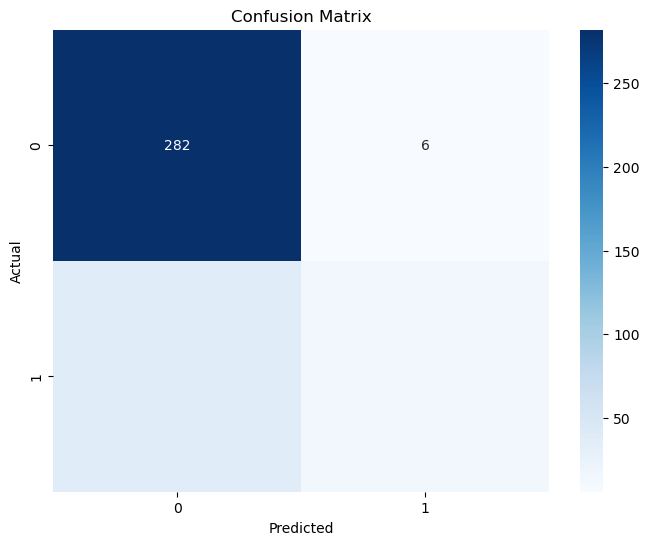

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test_log, y_pred_log))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       288
           1       0.70      0.27      0.39        52

    accuracy                           0.87       340
   macro avg       0.79      0.62      0.66       340
weighted avg       0.85      0.87      0.85       340



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_log, y_pred_log)

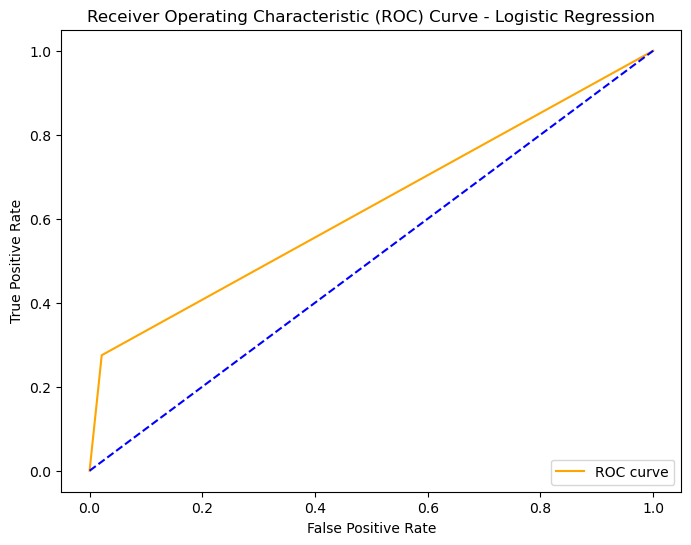

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# AUC Score
auc = roc_auc_score(y_test_log, y_pred_log)
print("AUC Score using Logistic Regressor:", auc)

AUC Score using Logistic Regressor: 0.624198717948718


### Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#splitting Train and Test data
x_train_knn,x_test_knn,y_train_knn,y_test_knn = train_test_split(x,y,test_size=0.25, random_state =40)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train_knn, y_train_knn)
y_pred_knn = model_knn.predict(x_test_knn)

In [ ]:
#Accuracy score
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print("Accuracy KNN:", accuracy_knn)


Accuracy KNN: 0.8325


In [ ]:
print("Classification Report using knn")
print(classification_report(y_test_knn, y_pred_knn))

Classification Report using knn
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       339
           1       0.41      0.21      0.28        61

    accuracy                           0.83       400
   macro avg       0.64      0.58      0.59       400
weighted avg       0.80      0.83      0.81       400



In [ ]:
cm_knn = confusion_matrix(y_test_knn , y_pred_knn)
print("Confusion Matrix using KNN Model:", cm_knn)

Confusion Matrix using KNN Model: [[320  19]
 [ 48  13]]


In [ ]:
# AUC Score
auc_knn = roc_auc_score(y_test_knn, y_pred_knn)
print("AUC Score using Logistic Regressor:", auc_knn)

AUC Score using Logistic Regressor: 0.5785337782291213


In [ ]:
#Different models results Accuracy Dataframe:
model_accuracy_table.loc[len(model_accuracy_table)]= ["KNN", accuracy_knn]
model_accuracy_table

,Models,Accuracy_Scores
0,Random forest Classifier:,0.89375
1,Logistic Regression:,0.86500
2,KNN,0.83250


In [ ]:
#The maximum accuracy is by using RandomForestClassifier model.